In [3]:
import pandas as pd          
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_excel("/Users/thuytrangneee/Downloads/data0979_enriched.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
sns.set(style="whitegrid", font_scale=1.1)

### **1. Xu hướng Total Order Demand theo thời gian (2012–2016)**

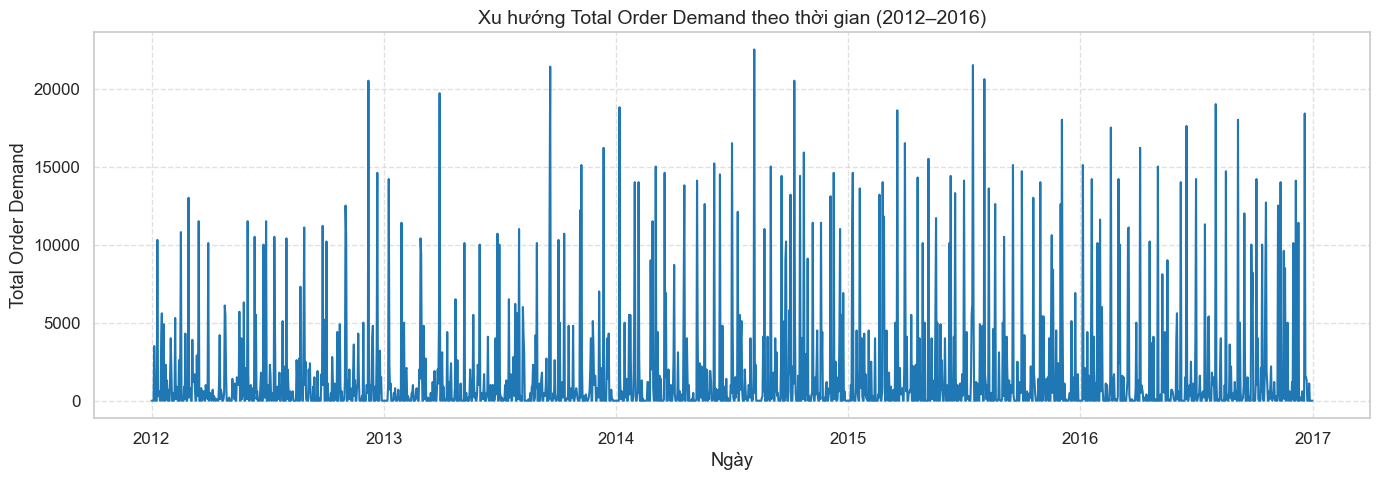

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Total_Order_Demand'], color='tab:blue')
plt.title("Xu hướng Total Order Demand theo thời gian (2012–2016)", fontsize=14)
plt.xlabel("Ngày")
plt.ylabel("Total Order Demand")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Nhận xét**
- Đường biểu diễn biến động mạnh theo thời gian.
- Xuất hiện nhiều đỉnh nhọn bất thường → phù hợp với giả định: các ngày này có khuyến mãi hoặc sự kiện kích cầu.
- Có nhiều đoạn demand bằng 0 → đúng với chủ trương thêm ngày thiếu dữ liệu.
- Không thấy xu hướng tăng trưởng rõ theo năm → sản phẩm có thể ít mở rộng thị trường hoặc nhu cầu ổn định theo chu kỳ.
##### *Kết luận: Đây là dữ liệu có tính mùa vụ và tác động sự kiện rõ rệt.*

### **2. Xu hướng trung bình order demand theo tháng**

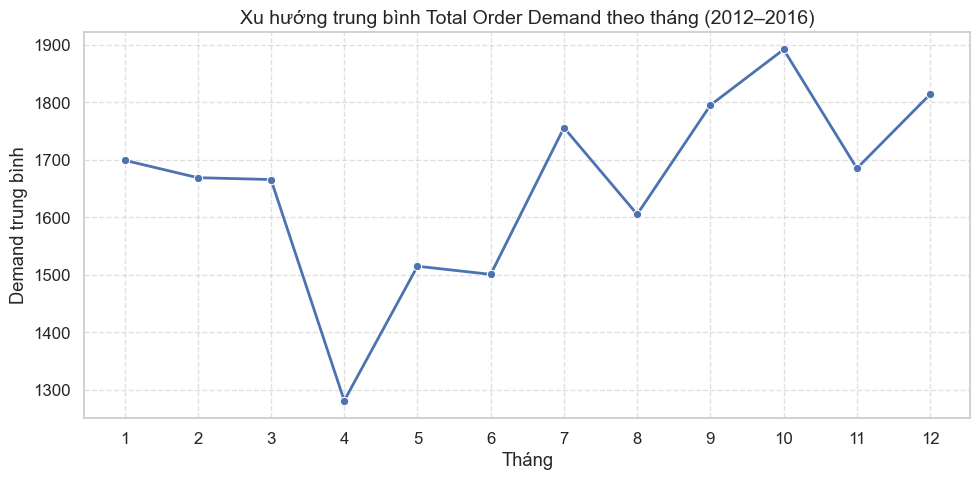

In [14]:
monthly_mean = (
    df.groupby('Month')['Total_Order_Demand']
    .mean()
    .reset_index()
)
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Total_Order_Demand', data=monthly_mean, marker='o', linewidth=2)
plt.title("Xu hướng trung bình Total Order Demand theo tháng (2012–2016)", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Demand trung bình")
plt.xticks(range(1,13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Nhận xét**
- Nhu cầu trung bình không ổn định, dao động mạnh giữa các tháng, cho thấy sự tồn tại của yếu tố mùa vụ (seasonality) trong hành vi đặt hàng.
- Tháng 4 là giai đoạn có mức Order Demand thấp nhất, chỉ khoảng 1.290 đơn.
- Từ tháng 5 đến tháng 7, nhu cầu dần tăng trở lại, cho thấy chu kỳ hồi phục giữa năm, có thể gắn liền với các chiến dịch bán hàng giữa năm (mid-year sales).
- Từ tháng 9 đến tháng 11, nhu cầu tăng mạnh và đạt đỉnh vào tháng 10, với mức trung bình gần 1.900 đơn.
- Đây là giai đoạn kích cầu cuối năm, trùng với các sự kiện mua sắm lớn như Black Friday, Lễ Giáng Sinh, hoặc các đợt khuyến mãi năm học mới / cuối quý III.
- Nhu cầu giảm nhẹ so với tháng 10 nhưng vẫn cao hơn trung bình toàn kỳ, cho thấy hiệu ứng mua sắm cuối năm vẫn duy trì.
#### **Kết luận:**
- Mặc dù có dao động giữa các tháng, nhưng xu hướng lặp lại qua nhiều năm (theo trung bình nhiều năm) → xác nhận mô hình có tính chu kỳ ổn định theo tháng.
- Biểu đồ cho thấy tính mùa vụ rất rõ trong nhu cầu sản phẩm — giai đoạn cuối năm là cao điểm tiêu thụ, trong khi đầu năm là giai đoạn trầm lắng.

### **3. Trung bình demand theo mùa và năm**

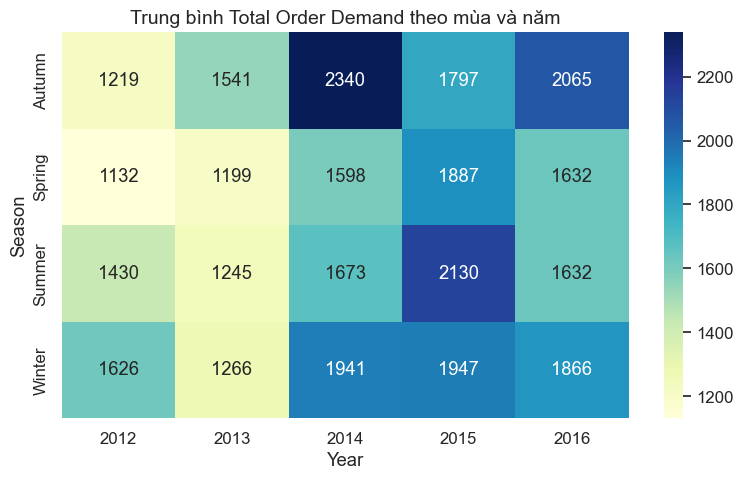

In [7]:
pivot_season_year = df.pivot_table(values='Total_Order_Demand', index='Season', columns='Year', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(pivot_season_year, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Trung bình Total Order Demand theo mùa và năm", fontsize=14)
plt.tight_layout()
plt.show()

#### **Nhận xét**
- Từ 2012 → 2014, nhu cầu tăng dần rõ rệt ở hầu hết các mùa, đạt đỉnh vào năm 2014.
- Sau đó, từ 2015 → 2016, nhu cầu có xu hướng giảm nhẹ hoặc ổn định, cho thấy giai đoạn tăng trưởng ban đầu đã chững lại.
##### *Phân tích theo mùa:*
- Mùa Thu (Autumn) có mức Order Demand cao nhất trung bình, đặc biệt năm 2014 đạt đỉnh 2340, phù hợp với các chiến dịch khuyến mãi lớn.
-  Mùa Đông (Winter) cũng duy trì mức cao ổn định (≈1600–1950), cho thấy nhu cầu tiêu dùng cuối năm luôn mạnh.
-  Mùa Hè (Summer) có xu hướng tăng đều từ 2012 → 2015, đạt đỉnh 2130 vào năm 2015, có thể do các hoạt động du lịch và giảm giá mùa hè.
-  Mùa Xuân (Spring) là mùa có nhu cầu thấp nhất, chỉ quanh mức 1100–1600, cho thấy giai đoạn này thị trường trầm lắng, ít hoạt động mua sắm lớn.
##### **Các điểm đáng chú ý:*
- Năm 2014 là năm cao điểm nhất trong chuỗi thời gian, với cả Autumn và Winter đều đạt giá trị cao → khả năng có nhiều chương trình khuyến mãi lớn hoặc tăng trưởng kinh tế tốt.
- Giai đoạn 2015–2016 chứng kiến sự giảm nhẹ ở hầu hết các mùa, cho thấy dấu hiệu bão hòa hoặc điều chỉnh thị trường.

### **4. Trung bình demand lễ và Black Friday**

/var/folders/61/pxqc1_2n3h9dyw4zr9tbp55m0000gn/T/ipykernel_38374/1512673119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Holiday','Black Friday'],


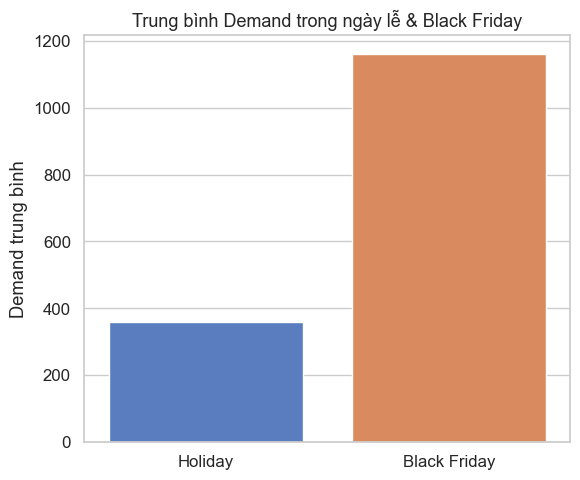

In [9]:
plt.figure(figsize=(6,5))
sns.barplot(x=['Holiday','Black Friday'], 
            y=[df.loc[df['Holiday']==1,'Total_Order_Demand'].mean(),
               df.loc[df['Black_Friday']==1,'Total_Order_Demand'].mean()],
            palette='muted')
plt.title("Trung bình Demand trong ngày lễ & Black Friday", fontsize=13)
plt.ylabel("Demand trung bình")
plt.tight_layout()
plt.show()

##### **Nhận xét :**
- Demand trung bình trong ngày lễ thông thường chỉ khoảng 350 đơn hàng.
- Trong khi đó, Black Friday có Demand trung bình lên đến khoảng 1150 đơn hàng.
- Mức tăng trưởng này gấp hơn 3 lần so với ngày lễ thông thường.
##### **Kết luận:**
- Black Friday có sức kích cầu rất mạnh, phản ánh tác động rõ rệt của các chương trình giảm giá quy mô lớn đến hành vi mua hàng của người tiêu dùng.
- Ngày lễ thông thường vẫn có mức cầu tăng so với ngày thường, nhưng không đáng kể bằng Black Friday — cho thấy mức độ “bùng nổ” nhu cầu của Black Friday là hiện tượng đặc biệt.

### **5. Phân bố Demand theo mùa**

/var/folders/61/pxqc1_2n3h9dyw4zr9tbp55m0000gn/T/ipykernel_38374/595187926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Total_Order_Demand', data=df, order=['Winter','Spring','Summer','Autumn'], palette='pastel')


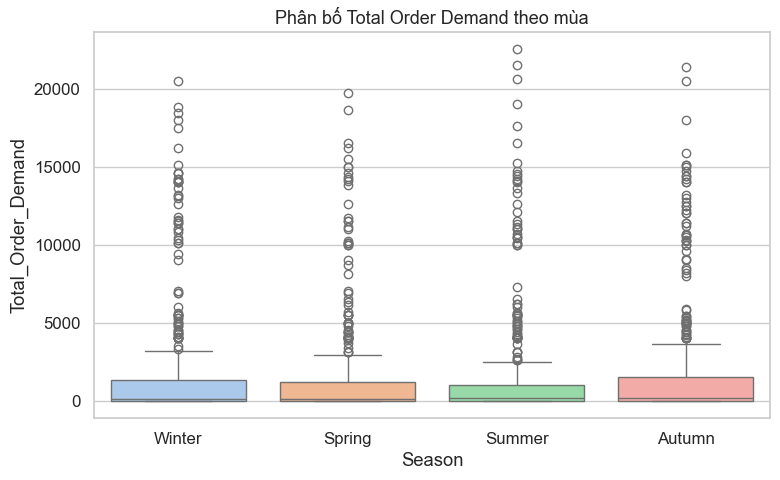

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Season', y='Total_Order_Demand', data=df, order=['Winter','Spring','Summer','Autumn'], palette='pastel')
plt.title("Phân bố Total Order Demand theo mùa", fontsize=13)
plt.tight_layout()
plt.show()

#### **Nhận xét :**
- Dữ liệu có nhiều điểm ngoại lai (outliers) ở cả bốn mùa, thể hiện những thời điểm nhu cầu tăng đột biến.
- Phần lớn giá trị Total_Order_Demand nằm trong khoảng thấp dưới 5000, nhưng có những đỉnh vượt trên 20000.
- Winter (mùa Đông) có median (giá trị trung vị) cao nhất trong bốn mùa, cho thấy nhu cầu trung bình trong mùa này nhỉnh hơn các mùa khác.
*→ Có thể do trùng với các dịp lễ lớn như Giáng sinh, Black Friday, năm mới.*
- Spring, Summer, và Autumn có phân bố tương đối tương đồng, không chênh lệch nhiều về median, nhưng vẫn xuất hiện một số đợt cao điểm bất thường (outlier).
- Tất cả các mùa đều có phân phối lệch phải (right-skewed) — tức đa số dữ liệu có Demand thấp, nhưng tồn tại một số giá trị cực lớn.
- Điều này thể hiện hành vi tiêu dùng không ổn định, phụ thuộc nhiều vào các sự kiện đặc biệt trong năm.

### **6. Ma trận tương quan giữa các biến**

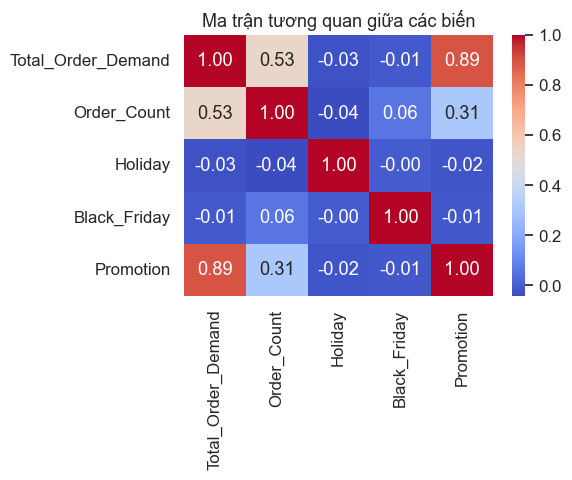

In [11]:
corr = df[['Total_Order_Demand', 'Order_Count', 'Holiday', 'Black_Friday', 'Promotion']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến", fontsize=13)
plt.tight_layout()
plt.show()

#### **Nhận xét chi tiết:**
- Total_Order_Demand và Promotion có hệ số tương quan rất cao (0.89) → cho thấy các chương trình khuyến mãi có ảnh hưởng mạnh mẽ đến nhu cầu đặt hàng.
##### *➤ Khi có khuyến mãi, tổng nhu cầu (Total_Order_Demand) tăng rõ rệt.*
- Total_Order_Demand và Order_Count có tương quan vừa phải (0.53) → số lượng đơn hàng tăng thì tổng nhu cầu cũng tăng, đúng với logic kinh doanh.
- Các biến Holiday và Black_Friday gần như không có tương quan tuyến tính rõ ràng với các biến khác (giá trị dao động quanh 0).
##### *→ Có thể vì tần suất xuất hiện ít hoặc ảnh hưởng của các ngày này chỉ xảy ra ngắn hạn, không thể hiện mạnh qua toàn bộ dữ liệu.*
- Promotion và Order_Count có tương quan thấp (0.31) → dù khuyến mãi làm tăng nhu cầu tổng, số lượng đơn hàng có thể không tăng tương ứng (ví dụ: một đơn hàng có giá trị lớn hơn).
#### **Tổng kết:**
- Promotion là yếu tố chính ảnh hưởng đến Total_Order_Demand.
- Order_Count cũng có liên quan đáng kể nhưng ít hơn.
- Holiday và Black_Friday không ảnh hưởng đáng kể về mặt tương quan tuyến tính, nhưng có thể ảnh hưởng phi tuyến 